# Analisis de factores de tipo de cambio, implementación en python 

# Marco teoríco

$$
X = WZ + \mu + \epsilon
$$

$$
X|Z -- > N(\mu + WX, \phi)
$$

Total de variables tiene dimesión $n$

Queremos _reducir dimensiones_ entonces decimos que Z tiene el numero de dimensiones que queremos reducir (llamemosle K), el trabajo de W será obtener una matriz de $nxk$.

Ojo que $\phi$ es una matriz diagonal.


Para sacar los parametros W que nos ayudan a redicir la dimensionalidad utilizamos el clasico algoritmo EM, para más información:
- http://cs229.stanford.edu/notes/cs229-notes9.pdf
- http://cs229.stanford.edu/notes/cs229-notes8.pdf

Epsilon es una gaussiana con $\mu$ = 0 y varianza constante 

- Z es de dimensión menor que el numero de variables en X
- W es una matriz de pesos (como en redes neuronales)
- El total de neuronas será a elección del usuario
- El objetivo es reducir la dimensionalidad


El objetivo de esto no es justificar teoríacamente sino implementar con datos reales, pasemos a esto, para ello utilizaremos el paquete SKLEARN.






El preprocesamiento es el mismo seguido en R para las componentes principales. Resumidamente:
- obtuvieron los rendimientos logatritmicos
- se estandarizo 

In [90]:
import pandas as pd
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import numpy as np

In [65]:
df = pd.read_csv("df.csv")
transformer = FactorAnalysis(n_components=2, random_state=0, max_iter=100000).fit(df)

In [66]:
reduction = transformer.transform(df)
first_dim = [i[0] for i in reduction]
second_dim = [i[1] for i in reduction]

No parece haber clusters, como que la primera dimensión capta más variablidad que la segunda.

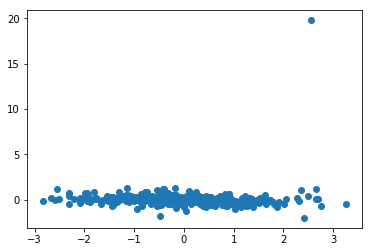

In [67]:
plt.scatter(first_dim, second_dim) 

La primera componente parece normal. 

(array([   8.,   20.,   42.,   97.,  125.,  105.,   58.,   24.,    7.,    5.]),
 array([-2.83939694, -2.22938579, -1.61937465, -1.0093635 , -0.39935235,
         0.2106588 ,  0.82066994,  1.43068109,  2.04069224,  2.65070338,
         3.26071453]),
 <a list of 10 Patch objects>)

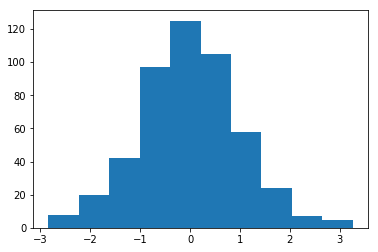

In [68]:
plt.hist(first_dim)

No es el caso de la segunda componente

(array([ 383.,  107.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([ -2.00191472,   0.17482844,   2.35157159,   4.52831475,
          6.7050579 ,   8.88180106,  11.05854421,  13.23528737,
         15.41203052,  17.58877368,  19.76551683]),
 <a list of 10 Patch objects>)

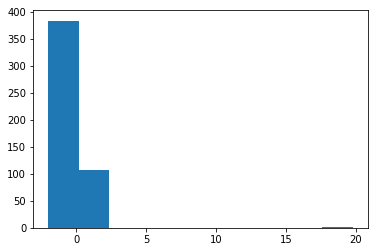

In [69]:
plt.hist(second_dim)

In [75]:
df1 = pd.DataFrame()
df1['paises'] = df.keys()
df1['primera'] = transformer.components_[0]
df1['segunda'] =transformer.components_[1]

Primero examinamos la primera dimensión, aquellos paíss que tienen valor absoluto menor en lambda son países llamados "vías en desarrollo"

In [86]:
df1.sort_values(by='primera').head(8)

,paises,primera,segunda
1,Mexico,-0.090951,-0.012326
3,El.Salvador,-0.056933,-0.003675
35,Russia,-0.050612,-0.013726
70,Ghana,-0.043165,0.014459
17,Uruguay,-0.035063,-0.026501
5,Costa.Rica,-0.032061,0.034763
12,Ecuador,-0.014146,0.059459
68,Sierra.Leone,-0.012743,0.008288


Aquellos que tienen más peso en lambda de la priemra dimensión som países "desarrollados"

In [85]:
df1.sort_values(by='primera').tail(8)

,paises,primera,segunda
25,Ireland,0.874461,-0.097395
19,EU12,0.953206,-0.095566
23,Denmark,0.959075,-0.107603
28,France,0.961747,-0.037246
26,Luxembourg,0.967007,-0.096008
30,Austria,0.968899,-0.107198
27,Netherlands,0.970662,-0.097067
29,Germany,0.977095,-0.104324


En este caso aquellos que tienen menor valor en la segunda son países que se considerarían "desarrollados"

In [87]:
df1.sort_values(by='segunda').head(8)

,paises,primera,segunda
20,Sweden,0.791993,-0.150220
22,Finland,0.865497,-0.116874
23,Denmark,0.959075,-0.107603
30,Austria,0.968899,-0.107198
29,Germany,0.977095,-0.104324
32,Hungary,0.379808,-0.104299
60,Australia,0.382647,-0.102626
25,Ireland,0.874461,-0.097395


Aquellos que tienen mayor valor en la segunda son países principalmente africanos

In [88]:
 df1.sort_values(by='segunda').tail(8)

,paises,primera,segunda
51,Malaysia,0.363869,0.062493
78,Zambia,0.031322,0.071199
67,Senegal,0.650353,0.589591
72,Benin,0.745958,0.599065
69,Cote.d.Ivoire,0.674855,0.616898
55,China.PR,0.265423,0.618324
73,Congo,0.579258,0.627879
66,Cameroon,0.693866,0.640428
